#Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('adult_with_headers.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Data Explorstion and Preprocessing

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [11]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Standard_Scaler = StandardScaler()
MinMax_Scaler = MinMaxScaler()

In [14]:
data_standard_scaled = data.copy()
data_minmax_scaled = data.copy()

In [15]:
numerical_cols = []

In [16]:
for i in data.columns:
  if data[i].dtype == 'int64':
    numerical_cols.append(i)

In [17]:
numerical_cols

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [18]:
data_standard_scaled[numerical_cols] = Standard_Scaler.fit_transform(data_standard_scaled[numerical_cols])
data_minmax_scaled[numerical_cols] = MinMax_Scaler.fit_transform(data_minmax_scaled[numerical_cols])

In [19]:
data_standard_scaled[numerical_cols].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [20]:
data_minmax_scaled[numerical_cols].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


# Discuss the scenarios where each scaling technique is preferred and why.
1. Standard Scaling
   Scenario: Standard scaling is preferred when the dataset exhibits a Gaussian distribution.

2. Min-Max Scaling Scenario: Min-Max scaling is preferred in scenarios where preserving the relationship between the original data values is crucial, particularly when the data does not have outliers.

- The Choice of scaling technique depends on the specific algorithm being used, the distribution of the dataset, and the presence of outliers. Understanding the nature of the data and the requirements of the chosen machine learning model is crucial for selecting the appropriate scaling method.

#Encoding Techniques

In [21]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [22]:
categorical_cols = []

In [23]:
for i in data.columns:
  if data[i].dtype == 'object':
    categorical_cols.append(i)

In [24]:
categorical_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [25]:
one_hot_cols = ['sex','income']
data_encoded = pd.get_dummies(data,columns=one_hot_cols,drop_first=True)

In [26]:
label_cols = ['workclass','education','marital_status','occupation','relationship','race','native_country']
label_encoder = LabelEncoder()

In [27]:
for col in label_cols:
  data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# Discuss the pros and cons of One-Hot Encoding and Label Encoding.

# 1. One-Hot Encoding:
    - Pros
        - No assumptions about the ordinal relationship between categories, making it suitable for nominal categorical variables.
        - Allows the model to learn from the presence or absence of a category independently.

    - Cons
        - Can lead tohigh-dimensional feature space when there are many categories, which may increase computation time and complexity.
        - Increases the risk of overfitting,especially in small datasets.

# 2. Label Encoding:
    - Pros
        - More memory efficient compared to One-Hot Encoding, as it converts categories into integeres rather than creating multiple binary columns.
        - Useful for tree-based algorithms (like decision trees,random forests) that can handle ordinal relationships well.

    - Cons
        - Implies an ordinal relationship among categories, which may mislead the model if the categories are nominal.

#Feature Engineering

In [28]:
bins = [0,18,30,45,60,100]
labels = ['Teenager','Young Adult','Adult','Middle-Aged','Senior']
data_encoded['age_group'] = pd.cut(data['age'],bins=bins,labels=labels)

In [29]:
data_encoded['hours_per_year'] = data_encoded['hours_per_week']*52

In [30]:
data_encoded['capital_gain_log'] = np.log1p(data_encoded['capital_gain'])

# Explain the rationale behind your choices.

# 1. New Feature Rationale:
    - Age Group: Grouping age into categories helps the model identify patterns related to different life stages.
    - Hours Worked per Year: Calculating yearly hours worked provides a clearer understanding of full-time vs. part-time workers, which can significantly impact predictions.

# 2. Log Transformation:
    - The log Transformation is applied to the capital_gain feature because it is highly skewed. The log transformation helps to normalize the distribution,reducing the effect of extreme values and allowing the model to better learn from the data.

#Feature Selection

In [31]:
from sklearn.ensemble import IsolationForest

In [32]:
is_forest = IsolationForest(contamination=0.05,random_state=42)

In [33]:
data_encoded['outliers'] = is_forest.fit_predict(data_encoded[numerical_cols])
data_encoded = data_encoded[data_encoded['outliers'] == 1]

# Discuss how outliers can affect model performance.

# Outlier Detection:
    - Outliers can negatively impact model performance by skewing results and leading to biased estimates. For instance, they can disproportinately affect the mean and standard deviation, leading to poor model training and generalization. Using the Isolation Forest algorithm allows for robust outlier detection, enabling the removal of such instances to improve model accuracy.

In [34]:
!pip install ppscore
import ppscore as pps

In [35]:
import pandas as pd
import ppscore as pps

In [36]:
pps_results = pps.matrix(data_encoded)
print(pps_results)

            x                 y  ppscore            case  is_valid_score  \
0         age               age      1.0  predict_itself            True   
1         age         workclass      0.0      regression            True   
2         age            fnlwgt      0.0      regression            True   
3         age         education      0.0      regression            True   
4         age     education_num      0.0      regression            True   
..        ...               ...      ...             ...             ...   
356  outliers      income_ >50K      0.0      regression            True   
357  outliers         age_group      0.0  classification            True   
358  outliers    hours_per_year      0.0      regression            True   
359  outliers  capital_gain_log      0.0      regression            True   
360  outliers          outliers      1.0  predict_itself            True   

                  metric  baseline_score   model_score  \
0                   None     

<function matplotlib.pyplot.show(close=None, block=None)>

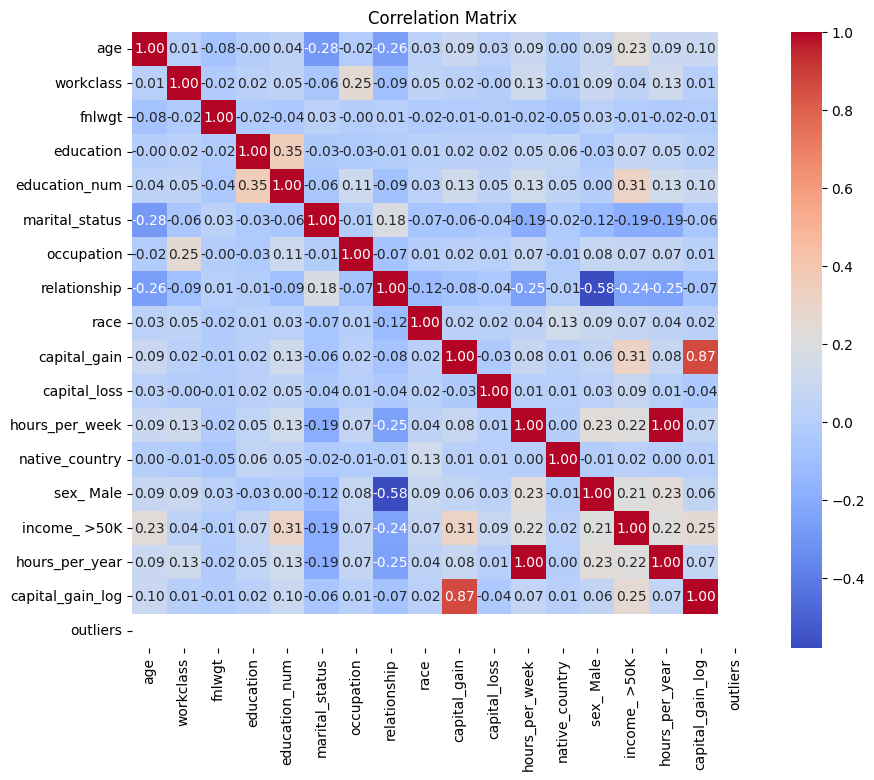

In [37]:
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show

# Compare pps findings with the correlation matrix.

- The Predictive Power Score (PPS) quantifies the strength of the relationship between two variables, providing insights into how well one variable can predict another. It accounts for non-linear relationships and is generally more informative than the Pearson correlation coefficient. In contrast, the correlation matrix only captures linear relationships and can be misleading with categorical data.
- Comapring PPS with correlation matrix:
    - We can identify features that are predictive but not strongly correlated, indicating potential interactions.
    - The PPS can reveal complex dependencies that may not be evident in a traditional correlational analysis, guiding features selection and engineering efforts effectively.